In [1]:
import pandas as pd
import numpy as np

# Getting target data

In [2]:
# sheet_names = 'Life Satisfaction - Means', 'Worthwhile - Means', 'Happy - Means'
df = pd.read_excel('../Raw Data/Happiness Data.xlsx', sheet_name='Happy - Means', skiprows=5, )

target_data = df.rename(columns={'Unnamed: 1': "Area Name", 'Unnamed: 2': "Type", 'Unnamed: 0' : 'Area Code'})

# Had to strip the data to correct 'local authority' vs 'local authority '
target_data['Type'] = target_data['Type'].str.strip()

target_data = target_data[target_data['Type']=='Local Authority']

target_data = target_data.set_index('Area Code')

target_data = target_data[['2011/12', '2012/13','2013/14', '2014/15', '2015/16', '2016/17', '2017/18', '2018/19','2019/20', '2020/21']]
target_data.columns = [column_name[:4] for column_name in target_data.columns]
                       
target_data = target_data.replace('x', np.NaN)
display(target_data)
display(len(target_data.dropna()))

#value_vars=['2011/12', '2012/13','2013/14', '2014/15', '2015/16', '2016/17', '2017/18', '2018/19','2019/20', '2020/21']
target_data_t = target_data.melt(ignore_index=False, value_vars=['2011', '2012','2013', '2014', '2015', '2016', '2017', '2018','2019', '2020'],
        var_name='Year', value_name='mean_happiness')

target_data_t

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Area Code,,,,,,,,,,
E06000047,7.12,7.06,7.17,7.41,7.29,7.53,7.57,7.53,7.36,7.40
E06000005,7.36,7.24,7.40,7.48,7.56,7.49,7.54,7.58,7.60,7.12
E06000001,7.27,7.15,7.40,7.50,7.26,7.44,7.47,7.39,7.31,7.21
E06000002,7.14,7.27,7.24,7.32,7.50,7.53,7.39,7.43,7.24,7.26
E06000057,7.24,7.44,7.45,7.44,7.58,7.51,7.47,7.47,7.39,7.28
...,...,...,...,...,...,...,...,...,...,...
N09000006,NaN,7.90,8.24,8.23,7.97,7.81,8.00,8.15,7.92,7.90
N09000007,NaN,8.15,7.57,7.78,7.44,7.80,7.89,7.91,7.53,7.56
N09000008,NaN,7.67,7.87,8.05,8.21,7.55,7.65,7.78,7.57,7.38


364

,Year,mean_happiness
Area Code,,
E06000047,2011,7.12
E06000005,2011,7.36
E06000001,2011,7.27
E06000002,2011,7.14
E06000057,2011,7.24
...,...,...
N09000006,2020,7.90
N09000007,2020,7.56
N09000008,2020,7.38


In [3]:
years = 5
target_data_trimmed = target_data_t.copy()

def create_time_series_columns(row):
    current_year = row['Year']
    area_code = row.name

    
    for i in range(years):
        i += 1
        column_name = 't-' + str(i)
        
        try:
            year = int(current_year) - i
            data = target_data[str(year)][area_code]
            row[column_name] = data
            
        except:
            row[column_name] = np.nan
        
    return row

#create_time_series_columns(target_data_trimmed.iloc[[746]])
target_data_trimmed = target_data_trimmed.apply(create_time_series_columns, axis=1)
target_data_trimmed['avg_la_happiness'] = target_data_trimmed[['mean_happiness', 't-1', 't-2', 't-3', 't-4', 't-5']].mean(axis=1, skipna=True).round(2)

target_data_t = target_data_trimmed.copy()
target_data_t

,Year,mean_happiness,t-1,t-2,t-3,t-4,t-5,avg_la_happiness
Area Code,,,,,,,,
E06000047,2011,7.12,NaN,NaN,NaN,NaN,NaN,7.12
E06000005,2011,7.36,NaN,NaN,NaN,NaN,NaN,7.36
E06000001,2011,7.27,NaN,NaN,NaN,NaN,NaN,7.27
E06000002,2011,7.14,NaN,NaN,NaN,NaN,NaN,7.14
E06000057,2011,7.24,NaN,NaN,NaN,NaN,NaN,7.24
...,...,...,...,...,...,...,...,...
N09000006,2020,7.90,7.92,8.15,8.00,7.81,7.97,7.96
N09000007,2020,7.56,7.53,7.91,7.89,7.80,7.44,7.69
N09000008,2020,7.38,7.57,7.78,7.65,7.55,8.21,7.69


## Area Codes to area names

In [4]:
# sheet_names = 'Life Satisfaction - Means', 'Worthwhile - Means', 'Happy - Means'
df = pd.read_excel('../Raw Data/Happiness Data.xlsx', sheet_name='Happy - Means', skiprows=5, )

df = df.rename(columns={'Unnamed: 1': "Area Name", 'Unnamed: 2': "Type", 'Unnamed: 0' : 'Area Code'})

# Had to strip the data to correct 'local authority' vs 'local authority '
df['Type'] = df['Type'].str.strip()
df = df[df['Type']=='Local Authority']

#df = df.set_index('Area Name')
df = df[['Area Name', 'Area Code']]

tmp = df['Area Name'].str.split('/').explode().to_frame()
tmp2 = tmp.join(df.iloc[:, 1:])

df = df.append(tmp2)
df = df.drop_duplicates()

df['Area Code'] = df['Area Code'].str.strip()
df['Area Name'] = df['Area Name'].str.strip()
df = df.set_index('Area Name')

df['Area Code'].to_excel('area_names_codes_dict.xlsx')


area_codes_to_names_dict = df['Area Code'].to_dict()

area_codes_to_names_dict


{'County Durham': 'E06000047',
 'Darlington': 'E06000005',
 'Hartlepool': 'E06000001',
 'Middlesbrough': 'E06000002',
 'Northumberland': 'E06000057',
 'Redcar and Cleveland': 'E06000003',
 'Stockton-on-Tees': 'E06000004',
 'Gateshead': 'E08000037',
 'Newcastle upon Tyne': 'E08000021',
 'North Tyneside': 'E08000022',
 'South Tyneside': 'E08000023',
 'Sunderland': 'E08000024',
 'Blackburn with Darwen': 'E06000008',
 'Blackpool': 'E06000009',
 'Cheshire East': 'E06000049',
 'Cheshire West and Chester': 'E06000050',
 'Halton': 'E06000006',
 'Warrington': 'E06000007',
 'Allerdale': 'E07000026',
 'Barrow-in-Furness': 'E07000027',
 'Carlisle': 'E07000028',
 'Copeland': 'E07000029',
 'Eden': 'E07000030',
 'South Lakeland': 'E07000031',
 'Bolton': 'E08000001',
 'Bury': 'E08000002',
 'Manchester': 'E08000003',
 'Oldham': 'E08000004',
 'Rochdale': 'E08000005',
 'Salford': 'E08000006',
 'Stockport': 'E08000007',
 'Tameside': 'E08000008',
 'Trafford': 'E08000009',
 'Wigan': 'E08000010',
 'Burnley':

In [5]:
county_df = pd.read_csv('../Raw Data/authority_to_county.csv')
county_dict = county_df.set_index('CTY21CD')['LAD21CD'].to_dict()
county_dict = county_df.set_index('LAD21CD')['CTY21CD'].to_dict()
county_dict

{'E07000008': 'E10000003',
 'E07000009': 'E10000003',
 'E07000134': 'E10000018',
 'E07000010': 'E10000003',
 'E07000135': 'E10000018',
 'E07000011': 'E10000003',
 'E07000012': 'E10000003',
 'E07000136': 'E10000019',
 'E07000137': 'E10000019',
 'E07000026': 'E10000006',
 'E07000027': 'E10000006',
 'E07000138': 'E10000019',
 'E07000139': 'E10000019',
 'E07000028': 'E10000006',
 'E07000029': 'E10000006',
 'E07000140': 'E10000019',
 'E07000141': 'E10000019',
 'E07000030': 'E10000006',
 'E07000031': 'E10000006',
 'E07000142': 'E10000019',
 'E07000143': 'E10000020',
 'E07000032': 'E10000007',
 'E07000033': 'E10000007',
 'E07000144': 'E10000020',
 'E07000145': 'E10000020',
 'E07000084': 'E10000014',
 'E07000034': 'E10000007',
 'E07000146': 'E10000020',
 'E07000085': 'E10000014',
 'E07000035': 'E10000007',
 'E07000147': 'E10000020',
 'E07000086': 'E10000014',
 'E07000036': 'E10000007',
 'E07000148': 'E10000020',
 'E07000087': 'E10000014',
 'E07000037': 'E10000007',
 'E07000149': 'E10000020',
 

In [6]:
area_names = list(area_codes_to_names_dict.keys())
print(len(area_names))

area_codes = list(set(list(area_codes_to_names_dict.values())))
print(len(area_codes))

419
381


# Area Code

In [7]:
area_codes_df = pd.DataFrame(area_codes, columns=['Area Code'])
area_codes_df['Code'] = area_codes_df['Area Code']
area_codes_df = area_codes_df.set_index('Area Code')

area_codes_df = pd.get_dummies(area_codes_df.Code, prefix='Code')
area_codes_df

,Code_E06000001,Code_E06000002,Code_E06000003,Code_E06000004,Code_E06000005,Code_E06000006,Code_E06000007,Code_E06000008,Code_E06000009,Code_E06000010,...,Code_W06000014,Code_W06000015,Code_W06000016,Code_W06000018,Code_W06000019,Code_W06000020,Code_W06000021,Code_W06000022,Code_W06000023,Code_W06000024
Area Code,,,,,,,,,,,,,,,,,,,,,
S12000005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E07000166,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
S12000047,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E07000036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E06000049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
E07000143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E06000020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E07000188,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Anxiety

In [8]:
# sheet_names = 'Life Satisfaction - Means', 'Worthwhile - Means', 'Happy - Means'
df = pd.read_excel('../Raw Data/Happiness Data.xlsx', sheet_name='Life Satisfaction - Means', skiprows=5, )

anxiety = df.rename(columns={'Unnamed: 1': "Area Name", 'Unnamed: 2': "Type", 'Unnamed: 0' : 'Area Code'})

# Had to strip the data to correct 'local authority' vs 'local authority '
anxiety['Type'] = anxiety['Type'].str.strip()

anxiety = anxiety[anxiety['Type']=='Local Authority']

anxiety = anxiety.set_index('Area Code')

anxiety = anxiety[['2011/12', '2012/13','2013/14', '2014/15', '2015/16', '2016/17', '2017/18', '2018/19','2019/20', '2020/21']]
anxiety.columns = [column_name[:4] for column_name in anxiety.columns]

anxiety_t = anxiety.melt(ignore_index=False, value_vars=['2011', '2012','2013', '2014', '2015', '2016', '2017', '2018','2019', '2020'],
        var_name='Year', value_name='mean_anxiety')

anxiety_t = anxiety_t[anxiety_t['mean_anxiety'] != 'x']
anxiety_t['mean_anxiety'] = anxiety_t['mean_anxiety'].astype(float)
anxiety_t

,Year,mean_anxiety
Area Code,,
E06000047,2011,7.52
E06000005,2011,7.50
E06000001,2011,7.48
E06000002,2011,7.41
E06000057,2011,7.49
...,...,...
N09000006,2020,7.76
N09000007,2020,7.67
N09000008,2020,7.30


# Worthwhile

In [9]:
# sheet_names = 'Life Satisfaction - Means', 'Worthwhile - Means', 'Happy - Means'
df = pd.read_excel('../Raw Data/Happiness Data.xlsx', sheet_name='Worthwhile - Means', skiprows=5, )

worthwhile = df.rename(columns={'Unnamed: 1': "Area Name", 'Unnamed: 2': "Type", 'Unnamed: 0' : 'Area Code'})

# Had to strip the data to correct 'local authority' vs 'local authority '
worthwhile['Type'] = worthwhile['Type'].str.strip()

worthwhile = worthwhile[worthwhile['Type']=='Local Authority']

worthwhile = worthwhile.set_index('Area Code')

worthwhile = worthwhile[['2011/12', '2012/13','2013/14', '2014/15', '2015/16', '2016/17', '2017/18', '2018/19','2019/20', '2020/21']]
worthwhile.columns = [column_name[:4] for column_name in worthwhile.columns]

worthwhile_t = worthwhile.melt(ignore_index=False, value_vars=['2011', '2012','2013', '2014', '2015', '2016', '2017', '2018','2019', '2020'],
        var_name='Year', value_name='mean_worthwhile')

worthwhile_t = worthwhile_t[worthwhile_t['mean_worthwhile'] != 'x']
worthwhile_t['mean_worthwhile'] = worthwhile_t['mean_worthwhile'].astype(float)
worthwhile_t

,Year,mean_worthwhile
Area Code,,
E06000047,2011,7.68
E06000005,2011,7.68
E06000001,2011,7.53
E06000002,2011,7.61
E06000057,2011,7.74
...,...,...
N09000006,2020,8.15
N09000007,2020,8.00
N09000008,2020,7.99


# Life satisfaction

In [10]:
# sheet_names = 'Life Satisfaction - Means', 'life_satisfaction - Means', 'Happy - Means'
df = pd.read_excel('../Raw Data/Happiness Data.xlsx', sheet_name='Life Satisfaction - Means', skiprows=5, )

life_satisfaction = df.rename(columns={'Unnamed: 1': "Area Name", 'Unnamed: 2': "Type", 'Unnamed: 0' : 'Area Code'})

# Had to strip the data to correct 'local authority' vs 'local authority '
life_satisfaction['Type'] = life_satisfaction['Type'].str.strip()

life_satisfaction = life_satisfaction[life_satisfaction['Type']=='Local Authority']

life_satisfaction = life_satisfaction.set_index('Area Code')

life_satisfaction = life_satisfaction[['2011/12', '2012/13','2013/14', '2014/15', '2015/16', '2016/17', '2017/18', '2018/19','2019/20', '2020/21']]
life_satisfaction.columns = [column_name[:4] for column_name in life_satisfaction.columns]

life_satisfaction_t = life_satisfaction.melt(ignore_index=False, value_vars=['2011', '2012','2013', '2014', '2015', '2016', '2017', '2018','2019', '2020'],
        var_name='Year', value_name='mean_life_satisfaction')

life_satisfaction_t = life_satisfaction_t[life_satisfaction_t['mean_life_satisfaction'] != 'x']
life_satisfaction_t['mean_life_satisfaction'] = life_satisfaction_t['mean_life_satisfaction'].astype(float)
life_satisfaction_t

,Year,mean_life_satisfaction
Area Code,,
E06000047,2011,7.52
E06000005,2011,7.50
E06000001,2011,7.48
E06000002,2011,7.41
E06000057,2011,7.49
...,...,...
N09000006,2020,7.76
N09000007,2020,7.67
N09000008,2020,7.30


# Suicide rates

In [11]:
suicide_rates = pd.read_excel('../Raw Data/suicide_rates.xlsx', sheet_name='Table 1', skiprows=5,)
suicide_rates = suicide_rates.rename(columns={'Area Codes': "Area Code"})

suicide_rates = suicide_rates[suicide_rates['Area Code'].isin(area_codes)]

suicide_rates = suicide_rates.set_index('Area Code')

suicide_rates = suicide_rates[[2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]]

suicide_rates

,2020,2019,2018,2017,2016,2015,2014,2013,2012,2011,2010
Area Code,,,,,,,,,,,
E06000047,67.0,60.0,69.0,56.0,51.0,59.0,64.0,92.0,46.0,66.0,60.0
E06000005,10.0,13.0,12.0,13.0,11.0,14.0,11.0,14.0,7.0,10.0,10.0
E06000001,13.0,10.0,8.0,8.0,13.0,7.0,5.0,7.0,12.0,12.0,7.0
E06000002,25.0,16.0,15.0,18.0,21.0,14.0,28.0,17.0,16.0,17.0,10.0
E06000057,22.0,34.0,37.0,30.0,24.0,28.0,38.0,39.0,34.0,33.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...
W06000018,16.0,18.0,15.0,19.0,11.0,16.0,15.0,23.0,12.0,18.0,9.0
W06000019,6.0,9.0,7.0,5.0,9.0,9.0,2.0,17.0,10.0,10.0,2.0
W06000020,5.0,0.0,5.0,7.0,12.0,9.0,4.0,3.0,6.0,8.0,6.0


In [12]:
suicide_rates_t = suicide_rates.melt(ignore_index=False)
suicide_rates_t = suicide_rates_t.rename(columns={'variable': "Year", 'value': "suicide_rate"})
suicide_rates_t['suicide_rate'] = suicide_rates_t['suicide_rate'].astype(float)
suicide_rates_t

,Year,suicide_rate
Area Code,,
E06000047,2020,67.0
E06000005,2020,10.0
E06000001,2020,13.0
E06000002,2020,25.0
E06000057,2020,22.0
...,...,...
W06000018,2010,9.0
W06000019,2010,2.0
W06000020,2010,6.0


In [13]:
len(suicide_rates_t.index.unique())

327

# Crimes

In [14]:
crimes = pd.read_excel('../Raw Data/crimes.xls', sheet_name='Data - csp', skiprows=1)
#crime_severity_score  = crimes.iloc[:, 3:22]
#crime_rate_per_1000  = crimes.iloc[:, 22:]
#crime_info = crimes.iloc[:, :3]
crimes = crimes.rename(columns={'Code': "Area Code"})
crimes = crimes.replace(':', np.nan)

# Currently using offence rater per 1000 population
crimes = crimes.drop(crimes.columns[list(range(3, 30))], axis=1)
crimes = crimes[crimes['Offence group']=='Total recorded crime']

crimes.columns = [c.replace('\n', '').replace('.1', '') for c in list(crimes.columns)]
crimes = crimes.drop(['Offence group', 'Community safety partnership'], 1)

crimes = crimes[crimes['Area Code'].isin(area_codes)]
crimes = crimes.set_index('Area Code')
crimes.columns = ['20' + column_name[5:7] for column_name in crimes.columns]

crimes_t = crimes.melt(ignore_index=False)
crimes_t = crimes_t.rename(columns={'variable': "Year", 'value': "crime_rate"})

crimes_t['crime_rate'] = crimes_t['crime_rate'].astype(float)
crimes_t

,Year,crime_rate
Area Code,,
E06000022,2009,61.769366
E06000023,2009,128.129656
E06000024,2009,63.937307
E06000025,2009,65.026941
E06000055,2009,76.606730
...,...,...
E08000034,2020,89.834397
E08000035,2020,110.943983
E08000036,2020,104.067618


In [15]:
len(crimes_t.index.unique())

297

# Population

In [16]:
population = pd.read_excel('../Raw Data/population.xls', sheet_name='MYE4', skiprows=7)
population = population[['Code', 'Mid-2020', 'Mid-2019', 'Mid-2018', 'Mid-2017', 'Mid-2016',
       'Mid-2015', 'Mid-2014', 'Mid-2013', 'Mid-2012', 'Mid-2011', 'Mid-2010']]


population = population.rename(columns={'Code': "Area Code"})

population = population[population['Area Code'].isin(area_codes)]
population = population.set_index('Area Code')
population.columns = [column_name[4:] for column_name in population.columns]

population_t = population.melt(ignore_index=False)

population_t = population_t.rename(columns={'variable': "Year", 'value': "population"})
population_t['population'] = population_t['population'].astype(float)

population_t

,Year,population
Area Code,,
E06000047,2020,533149.0
E06000005,2020,107402.0
E06000001,2020,93836.0
E06000002,2020,141285.0
E06000057,2020,323820.0
...,...,...
N09000006,2010,112919.0
N09000007,2010,133909.0
N09000008,2010,135157.0


In [17]:
len(population_t.index.unique())

370

# Population Density

In [18]:
population_density = pd.read_excel('../Raw Data/population.xls', sheet_name='MYE 5', skiprows=7)

columns_to_keep = ['Code', '2020 people per sq. km', '2019 people per sq. km',
       '2018 people per sq. km', '2017 people per sq. km',
       '2016 people per sq. km', '2015 people per sq. km',
       '2014 people per sq. km', '2013 people per sq. km',
       '2012 people per sq. km', '2011 people per sq. km',
       '2010 people per sq. km', '2009 people per sq. km']

population_density = population_density[columns_to_keep]
population_density = population_density.rename(columns={'Code': "Area Code"})

population_density = population_density[population_density['Area Code'].isin(area_codes)]
population_density = population_density.set_index('Area Code')
population_density.columns = [column_name[:4] for column_name in population_density.columns]

population_density_t = population_density.melt(ignore_index=False)

population_density_t = population_density_t.rename(columns={'variable': "Year", 'value': "population_density"})
population_density_t['population_density'] = population_density_t['population_density'].astype(float)

population_density_t

,Year,population_density
Area Code,,
E06000047,2020,239.522161
E06000005,2020,543.874237
E06000001,2020,1001.317860
E06000002,2020,2622.138170
E06000057,2020,64.508175
...,...,...
N09000006,2009,39.105011
N09000007,2009,261.743419
N09000008,2009,127.239692


In [19]:
len(population_density_t.index.unique())

370

# Unemployment

Unemployment levels measure the total number of people estimated to be unemployed while unemployment rates allow changes in the labour market to be interpreted in a wider context by allowing for changes in the population.

In [20]:
unemployment = pd.read_excel('../Raw Data/unemployment.xls', header=[0,1], sheet_name='LA,UA Rates', skiprows=2)
unemployment.columns = ['_'.join(col) for col in unemployment.columns.values]
unemployment = unemployment.rename(columns={'UALAD_Unnamed: 1_level_1':'Area Code'})

#Could change Jan to Apr for Apr to Mar
columns_to_keep = ['Area Code'] + list(unemployment.columns[unemployment.columns.str.match('^Jan.*\(%\)$')])

unemployment = unemployment[columns_to_keep]
unemployment = unemployment.replace(':', np.nan)

unemployment = unemployment[unemployment['Area Code'].isin(area_codes)]
unemployment = unemployment.set_index('Area Code')
unemployment.columns = [column_name[4:8] for column_name in unemployment.columns]

unemployment_t = unemployment.melt(ignore_index=False)

unemployment_t = unemployment_t.rename(columns={'variable': "Year", 'value': "unemployment_rate"})
unemployment_t['unemployment_rate'] = unemployment_t['unemployment_rate'].astype(float)

unemployment_t

,Year,unemployment_rate
Area Code,,
E06000047,2006,5.900000
E06000005,2006,5.104456
E06000001,2006,8.555503
E06000002,2006,8.000104
E06000057,2006,5.900000
...,...,...
S12000028,2020,4.870802
S12000029,2020,4.237242
S12000030,2020,3.470562


# Region

https://geoportal.statistics.gov.uk/datasets/6a41affae7e345a7b2b86602408ea8a2_0/explore

In [21]:
la_mappings = pd.read_csv('../Raw Data/la mappings.csv')

la_mappings = la_mappings.rename(columns={'LAD21CD':'Area Code', 'LAD21NM':'Area Name', 'RGN21NM':'region'})

la_mappings_dict = la_mappings.set_index('Area Code')['region'].to_dict()

region_df = pd.DataFrame(area_codes, columns=['Area Code'])

region_df['region']= region_df['Area Code'].map(la_mappings_dict)

region_df = region_df.set_index('Area Code')

region_df = pd.get_dummies(region_df.region, prefix='region')

region_df['region_Wales'] = np.where(region_df.index.str.contains("W"), 1, 0)
region_df['region_Scotland'] = np.where(region_df.index.str.contains("S"), 1, 0)
region_df['region_NIreland'] = np.where(region_df.index.str.contains("N"), 1, 0)

region_df = region_df[region_df.index.isin(area_codes)]

region_df

,region_East Midlands,region_East of England,region_London,region_North East,region_North West,region_South East,region_South West,region_West Midlands,region_Yorkshire and The Humber,region_Wales,region_Scotland,region_NIreland
Area Code,,,,,,,,,,,,
S12000005,0,0,0,0,0,0,0,0,0,0,1,0
E07000166,0,0,0,0,0,0,0,0,1,0,0,0
S12000047,0,0,0,0,0,0,0,0,0,0,1,0
E07000036,1,0,0,0,0,0,0,0,0,0,0,0
E06000049,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
E07000143,0,1,0,0,0,0,0,0,0,0,0,0
E06000020,0,0,0,0,0,0,0,1,0,0,0,0
E07000188,0,0,0,0,0,0,1,0,0,0,0,0


# Rainy Days

https://www.statista.com/statistics/610677/annual-raindays-uk/

In [22]:
rainy_days = {2010:144.5, 
              2011:158.6, 
              2012:174.3, 
              2013:150.3, 
              2014:174.8, 
              2015:168.2, 
              2016:156.2, 
              2017:164.9, 
              2018:150.6, 
              2019:164.7, 
              2020:170.5}

# Inflation

In [23]:
inflation = pd.read_csv('../Raw Data/inflation.csv', skiprows=4)
inflation = inflation[inflation['Country Code']=='GBR']
columns_to_keep = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
inflation = inflation[columns_to_keep]

inflation_t = inflation.melt(ignore_index=True)
inflation_t = inflation_t.rename(columns={'variable': "Year", 'value': "inflation"})

inflation_t['Year'] = inflation_t['Year'].astype(int)
inflation_t = inflation_t.set_index('Year')

inflation_dict = inflation_t['inflation'].to_dict()
inflation_dict

{2011: 3.856112447,
 2012: 2.573234797,
 2013: 2.291666667,
 2014: 1.451120163,
 2015: 0.368046842,
 2016: 1.008417368,
 2017: 2.557755776,
 2018: 2.292839903,
 2019: 1.738104601,
 2020: 0.989486704}

# Settlement size

In [24]:
settle_size = pd.read_excel('../Raw Data/Settlement size/CBP-8322 (3).xlsx', sheet_name='Local Authority Classification', skiprows=1)


columns_to_keep = ['Local authority code', 'Core City.1', 'Other City.1', 'Large Town.1',
       'Medium Town.1', 'Small Town.1', 'Village or smaller.1',]

settle_size = settle_size[columns_to_keep]

settle_size.columns = [col.replace('.1', '') for col in settle_size.columns]

settle_size = settle_size[settle_size['Local authority code'].isin(area_codes)]
settle_size = settle_size.rename(columns={'Local authority code': "Area Code"})
settle_size = settle_size.set_index('Area Code')

display(settle_size)

#Do we want to make these into percentages instead of values?
settle_size['Total Population'] = settle_size.sum(axis=1)
for col in settle_size.columns:
    settle_size[col] = (settle_size[col]/settle_size['Total Population'])*100
settle_size = settle_size.drop('Total Population', 1) 

    
display(settle_size)

,Core City,Other City,Large Town,Medium Town,Small Town,Village or smaller
Area Code,,,,,,
S12000033,0,196840.0,0,0,6806,26194
S12000034,0,0.0,0,0,92327,169863
E07000223,0,0.0,0,50465,12170,871
E07000026,0,0.0,0,0,41003,55953
E07000032,0,0.0,0,26084,66673,31888
...,...,...,...,...,...,...
E07000238,0,0.0,658,26642,31605,64038
E07000007,0,0.0,119461,0,23096,34311
E07000128,0,0.0,4449,25607,47752,32453


,Core City,Other City,Large Town,Medium Town,Small Town,Village or smaller
Area Code,,,,,,
S12000033,0.0,85.642186,0.000000,0.000000,2.961190,11.396624
S12000034,0.0,0.000000,0.000000,0.000000,35.213776,64.786224
E07000223,0.0,0.000000,0.000000,79.464932,19.163544,1.371524
E07000026,0.0,0.000000,0.000000,0.000000,42.290317,57.709683
E07000032,0.0,0.000000,0.000000,20.926632,53.490312,25.583056
...,...,...,...,...,...,...
E07000238,0.0,0.000000,0.535207,21.670205,25.707035,52.087553
E07000007,0.0,0.000000,67.542461,0.000000,13.058326,19.399213
E07000128,0.0,0.000000,4.034972,23.223987,43.308151,29.432891


# Mean Income Support

In [25]:
mean_income_support = pd.read_excel('../Raw Data/income support/mean weekly income support august.xlsx', skiprows=6)
mean_income_support = mean_income_support.drop([0, 1], axis=0)
mean_income_support = mean_income_support.drop(['Quarter'], axis=1)

mean_income_support = mean_income_support.rename(columns={'Unnamed: 1':'Area Name'})

mean_income_support = mean_income_support[mean_income_support['Area Name'].isin(area_names)]
mean_income_support['Area Code']= mean_income_support['Area Name'].map(area_codes_to_names_dict)
mean_income_support = mean_income_support.drop('Area Name', axis=1)


mean_income_support = mean_income_support.set_index('Area Code')
mean_income_support.columns = ['20'+column_name[-2:] for column_name in mean_income_support.columns]
mean_income_support = mean_income_support.replace(':', np.nan).replace('..', np.nan)

mean_income_support_t = mean_income_support.melt(ignore_index=False)
mean_income_support_t = mean_income_support_t.rename(columns={'variable': "Year", 'value': "mean_income_support"})
mean_income_support_t['mean_income_support'] = mean_income_support_t['mean_income_support'].astype(float)

mean_income_support_t

,Year,mean_income_support
Area Code,,
E06000047,2009,81.21
E06000005,2009,83.23
E06000001,2009,83.50
E06000002,2009,86.03
E06000057,2009,79.06
...,...,...
S12000028,2021,77.95
S12000029,2021,77.04
S12000030,2021,75.19


# No. Claimants collecting Income Support

In [26]:
n_is_claimants = pd.read_excel('../Raw Data/income support/number of claimants income support august.xlsx', skiprows=9)

n_is_claimants = n_is_claimants.drop([0, 1], axis=0)
n_is_claimants = n_is_claimants.drop(['Quarter'], axis=1)

n_is_claimants = n_is_claimants.rename(columns={'Unnamed: 1':'Area Name'})

n_is_claimants = n_is_claimants[n_is_claimants['Area Name'].isin(area_names)]
n_is_claimants['Area Code']= n_is_claimants['Area Name'].map(area_codes_to_names_dict)
n_is_claimants = n_is_claimants.drop('Area Name', axis=1)


n_is_claimants = n_is_claimants.set_index('Area Code')
n_is_claimants.columns = ['20'+column_name[-2:] for column_name in n_is_claimants.columns]
n_is_claimants = n_is_claimants.replace(':', np.nan).replace('..', np.nan)

n_is_claimants_t = n_is_claimants.melt(ignore_index=False)
n_is_claimants_t = n_is_claimants_t.rename(columns={'variable': "Year", 'value': "income_support_claimants"})
n_is_claimants_t['income_support_claimants'] = n_is_claimants_t['income_support_claimants'].astype(float)

n_is_claimants_t

,Year,income_support_claimants
Area Code,,
E06000005,2009,3767.0
E06000001,2009,4681.0
E06000002,2009,8096.0
E06000057,2009,8351.0
E06000003,2009,5770.0
...,...,...
S12000028,2021,358.0
S12000029,2021,1295.0
S12000030,2021,200.0


# Gardens

https://www.ons.gov.uk/economy/environmentalaccounts/datasets/accesstogardensandpublicgreenspaceingreatbritain

In [27]:
gardens = pd.read_excel('../Raw Data/gardens.xlsx', skiprows=1, sheet_name='LAD gardens')
gardens = gardens.rename(columns={'Unnamed: 4': "Area Code", "Percentage of adresses with private outdoor space.2":"gardens_perc"})
gardens = gardens[['Area Code', 'gardens_perc']]
gardens = gardens[gardens['Area Code'].isin(area_codes)]

gardens = gardens.set_index('Area Code')
gardens_dict = gardens['gardens_perc'].to_dict()
gardens_dict

{'S12000033': 0.824,
 'S12000034': 0.909,
 'E07000223': 0.895,
 'E07000026': 0.916,
 'E07000032': 0.936,
 'S12000041': 0.869,
 'S12000035': 0.813,
 'E07000224': 0.92,
 'E07000170': 0.944,
 'E07000105': 0.886,
 'E07000004': 0.884,
 'E07000200': 0.936,
 'E09000002': 0.845,
 'E09000003': 0.8,
 'E08000016': 0.943,
 'E07000027': 0.938,
 'E07000066': 0.905,
 'E07000084': 0.924,
 'E07000171': 0.946,
 'E06000022': 0.9,
 'E06000055': 0.909,
 'E09000004': 0.885,
 'E08000025': 0.859,
 'E07000129': 0.925,
 'E06000008': 0.946,
 'E06000009': 0.911,
 'W06000019': 0.942,
 'E07000033': 0.942,
 'E08000001': 0.914,
 'E07000136': 0.933,
 'E06000058': 0.885,
 'E06000036': 0.895,
 'E08000032': 0.873,
 'E07000067': 0.901,
 'E07000143': 0.926,
 'E09000005': 0.818,
 'E07000068': 0.888,
 'W06000013': 0.937,
 'E06000043': 0.87,
 'E06000023': 0.84,
 'E07000144': 0.958,
 'E09000006': 0.854,
 'E07000234': 0.919,
 'E07000095': 0.875,
 'E07000172': 0.935,
 'E07000117': 0.936,
 'E08000002': 0.934,
 'W06000018': 0.941,

 # House Sales

https://www.ons.gov.uk/peoplepopulationandcommunity/housing/datasets/numberofresidentialpropertysalesfornationalandsubnationalgeographiesquarterlyrollingyearhpssadataset06

In [28]:
house_sales = pd.read_excel('../Raw Data/house_sales.xls', skiprows=6, sheet_name='2a')

columns = ['Local authority code ',
 'Year ending Mar 2009',
 'Year ending Mar 2010',
 'Year ending Mar 2011',
 'Year ending Mar 2012',
 'Year ending Mar 2013',
 'Year ending Mar 2014',
 'Year ending Mar 2015',
 'Year ending Mar 2016',
 'Year ending Mar 2017',
 'Year ending Mar 2018',
 'Year ending Mar 2019',
 'Year ending Mar 2020',
 'Year ending Mar 2021']

house_sales = house_sales[columns]
house_sales.columns = [column.replace('Year ending Mar ', '') for column in house_sales.columns]
house_sales = house_sales[house_sales['Local authority code '].isin(area_codes)]
house_sales = house_sales.rename(columns={'Local authority code ':'Area Code'})
house_sales = house_sales.set_index('Area Code')


house_sales_t = house_sales.melt(ignore_index=False)

house_sales_t = house_sales_t.rename(columns={'variable': "Year", 'value': "house_sales"})
house_sales_t['house_sales'] = house_sales_t['house_sales'].astype(float)

house_sales_t

,Year,house_sales
Area Code,,
E06000001,2009,945.0
E06000002,2009,1384.0
E06000003,2009,1305.0
E06000004,2009,2145.0
E06000005,2009,1290.0
...,...,...
W06000020,2021,1007.0
W06000021,2021,1107.0
W06000022,2021,1746.0


# Ofsed reports

In [29]:
ofsted = pd.read_csv('../Raw Data/ofsted.csv', parse_dates = ['Inspection start date'])

ofsted = ofsted[['Local authority', 'Inspection start date', 'Overall effectiveness']]

ofsted['Inspection start date'] = pd.DatetimeIndex(ofsted['Inspection start date']).year

ofsted = ofsted.rename(columns={'Inspection start date':'Year', 'Local authority':'Area Name', 'Overall effectiveness': 'ofsted_avg'})

ofsted = ofsted.groupby(['Area Name', 'Year']).mean()
ofsted = ofsted.reset_index()
ofsted

set(ofsted[~ofsted['Area Name'].isin(area_names)]['Area Name'])

area_codes_to_names_dict = pd.read_excel('area_names_codes_dict.xlsx').set_index('Area Name')['Area Code'].to_dict()
ofsted['Area Code']= ofsted['Area Name'].map(area_codes_to_names_dict)
ofsted = ofsted.drop('Area Name', axis=1)

ofsted = ofsted.set_index('Area Code')

ofsted['ofsted_avg'] = ofsted['ofsted_avg'].astype(float)

ofsted

C:\Users\gv9\Anaconda3\envs\uniwork\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Year,ofsted_avg
Area Code,,
E09000002,2011.0,2.000000
E09000002,2012.0,1.833333
E09000002,2013.0,2.000000
E09000002,2014.0,1.750000
E09000002,2015.0,2.000000
...,...,...
E06000014,2017.0,2.250000
E06000014,2018.0,2.500000
E06000014,2019.0,2.333333


# Bankruptcy

https://www.gov.uk/government/statistics/individual-insolvencies-by-location-age-and-gender-england-and-wales-2020

In [30]:
bankruptcy = pd.read_excel('../Raw Data/bankruptcy.xlsx', skiprows=5, sheet_name='Table_2a')

columns = ['Area Code', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
bankruptcy = bankruptcy[columns]

bankruptcy = bankruptcy[bankruptcy['Area Code'].isin(area_codes)]

bankruptcy = bankruptcy.set_index('Area Code')


bankruptcy_t = bankruptcy.melt(ignore_index=False)

bankruptcy_t = bankruptcy_t.rename(columns={'variable': "Year", 'value': "bankruptcy"})
bankruptcy_t['bankruptcy'] = bankruptcy_t['bankruptcy'].astype(float)

bankruptcy_t

,Year,bankruptcy
Area Code,,
E06000047,2011,511.0
E06000005,2011,78.0
E06000001,2011,68.0
E06000002,2011,102.0
E06000057,2011,325.0
...,...,...
W06000018,2020,35.0
W06000019,2020,10.0
W06000020,2020,30.0


# Housing benefit claim times

This measures the average time taken in calendar days to process all new claims relating to Housing Benefit for that quarter.

https://lginform.local.gov.uk/reports/lgastandard?mod-metric=299&mod-period=40&mod-area=E06000031&mod-group=AllLaInCountry&mod-type=comparisonGroupType

In [31]:
processing = pd.read_csv('../raw data/housing_benefit_processing.csv', skiprows=5)
columns = ['area', 'fq_Q3_2011_12',
 'fq_Q3_2012_13',
 'fq_Q3_2013_14',
 'fq_Q3_2014_15',
 'fq_Q3_2015_16',
 'fq_Q3_2016_17',
 'fq_Q3_2017_18',
 'fq_Q3_2018_19',
 'fq_Q3_2019_20',
 'fq_Q3_2020_21']

processing = processing[columns]
processing = processing.rename(columns={'area': "Area Code"})

processing = processing.set_index('Area Code')
processing.columns = ['20' + column[-2:] for column in processing.columns]
processing = processing.replace('Missing', np.nan).replace('no value', np.nan).replace()


processing_t = processing.melt(ignore_index=False)
processing_t = processing_t.rename(columns={'variable': "Year", 'value': "processing_times"})


processing_t

,Year,processing_times
Area Code,,
E07000223,2012,14
E07000026,2012,37
E07000032,2012,15
E07000224,2012,16
E07000170,2012,30
...,...,...
E07000229,2021,11
E07000238,2021,22
E07000128,2021,16


# Road Casualties

In [32]:
road_casualties = pd.read_csv('../raw data/road_casualties.csv', skiprows=5)
columns = ['area', 'threeyp_2011_13',
       'threeyp_2012_14', 'threeyp_2013_15', 'threeyp_2014_16',
       'threeyp_2015_17', 'threeyp_2016_18']
road_casualties = road_casualties[columns]
road_casualties = road_casualties.rename(columns={'area': "Area Code"})

road_casualties = road_casualties.set_index('Area Code')
road_casualties.columns = ['20' + column[-2:] for column in road_casualties.columns]
road_casualties = road_casualties.replace('Missing', np.nan).replace('no value', np.nan).replace("Suppressed", np.nan)


road_casualties_t = road_casualties.melt(ignore_index=False)
road_casualties_t = road_casualties_t.rename(columns={'variable': "Year", 'value': "road_casualties"})

road_casualties_t

,Year,road_casualties
Area Code,,
E07000223,2013,51.1
E07000026,2013,48.5
E07000032,2013,35.3
E07000224,2013,44.4
E07000170,2013,48.6
...,...,...
E07000229,2018,46.2
E07000238,2018,47.9
E07000128,2018,47.4


# Productivity

https://www.ons.gov.uk/employmentandlabourmarket/peopleinwork/labourproductivity/datasets/subregionalproductivitylabourproductivityindicesbylocalauthoritydistrict

In [33]:
productivity = pd.read_excel('../raw data/ladproductivity.xls', skiprows=3, sheet_name='B1')
productivity = productivity.drop([0, 1], axis=0)

productivity = productivity.rename(columns={'Unnamed: 0': "Area Code"})

columns = ["Area Code", 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,  2019]


productivity = productivity[productivity['Area Code'].isin(area_codes)]
productivity = productivity[columns]

productivity = productivity.set_index('Area Code')

productivity_t = productivity.melt(ignore_index=False)
productivity_t = productivity_t.rename(columns={'variable': "Year", 'value': "productivity"})
productivity_t['productivity'] = productivity_t['productivity'].astype(float)
productivity_t

,Year,productivity
Area Code,,
E06000001,2009,73.65
E06000002,2009,73.55
E06000003,2009,83.22
E06000004,2009,105.78
E06000005,2009,88.34
...,...,...
W06000020,2019,77.06
W06000021,2019,81.97
W06000022,2019,85.85


# Infant mortality

In [34]:
years = [2011, 2012, 2013, 2014, 2015, 2015, 2016, 2017, 2018, 2019, 2020]

infant_mortality = pd.read_excel('../Raw Data/infant_mortality.xlsx', sheet_name='Indicator data', skiprows=14)
infant_mortality['infant_mortality'] = infant_mortality['Infant deaths']/infant_mortality['Live births']
infant_mortality = infant_mortality[['Year', 'Level ','infant_mortality', ]]
infant_mortality = infant_mortality[infant_mortality['Level '].isin(area_codes)]
infant_mortality = infant_mortality[infant_mortality['Year'].isin(years)]

infant_mortality = infant_mortality.rename(columns={'Level ': "Area Code"})
infant_mortality = infant_mortality.set_index('Area Code')

infant_mortality

,Year,infant_mortality
Area Code,,
E07000223,2019,0.003373
E07000026,2019,0.001323
E07000032,2019,0.006066
E07000224,2019,0.005835
E07000170,2019,0.005143
...,...,...
E07000238,2011,0.001778
E07000007,2011,0.003103
E07000128,2011,0.006067


# Childhood tooth Decay

In [35]:
childhood_tooth_decay = pd.read_excel('../Raw Data/childhood_tooth_decay.xlsx', sheet_name='Indicator data', skiprows=14)
childhood_tooth_decay = childhood_tooth_decay[['Year', 'Level','Indicator value']]
childhood_tooth_decay = childhood_tooth_decay[childhood_tooth_decay['Level'].isin(area_codes)]

childhood_tooth_decay = childhood_tooth_decay.rename(columns={'Level': "Area Code", 'Indicator value':'childhood_tooth_decay'})
childhood_tooth_decay = childhood_tooth_decay.set_index('Area Code')
childhood_tooth_decay = childhood_tooth_decay.replace('*', np.nan)
childhood_tooth_decay['Year'] = childhood_tooth_decay['Year'].str[:4]
childhood_tooth_decay['Year'] = childhood_tooth_decay['Year'].astype(int)
childhood_tooth_decay = childhood_tooth_decay[childhood_tooth_decay['Year'].isin(years)]


childhood_tooth_decay = childhood_tooth_decay.reset_index()
childhood_tooth_decay = childhood_tooth_decay.drop_duplicates()
childhood_tooth_decay.set_index('Area Code')

,Year,childhood_tooth_decay
Area Code,,
E07000223,2019,95.5
E07000026,2019,NaN
E07000032,2019,NaN
E07000224,2019,105.1
E07000170,2019,100.5
...,...,...
E07000238,2011,NaN
E07000007,2011,467.7
E07000128,2011,1242.3


# GP access

In [36]:
gp_access = pd.read_excel('../Raw Data/gp_access.xlsx', sheet_name='Indicator data', skiprows=14)
gp_access = gp_access[['Year', 'Period of coverage', 'Level','Indicator value']]
gp_access = gp_access[gp_access['Level'].isin(area_codes)]

gp_access = gp_access.rename(columns={'Level': "Area Code", 'Indicator value':'gp_access'})
gp_access = gp_access.set_index('Area Code')
gp_access = gp_access.replace('*', np.nan)
gp_access['Year'] = gp_access['Period of coverage'].str[-4:]
gp_access = gp_access.drop('Period of coverage', axis=1)
gp_access['Year'] = gp_access['Year'].astype(int)
gp_access = gp_access[gp_access['Year'].isin(years)]


gp_access = gp_access.drop_duplicates()
gp_access

,Year,gp_access
Area Code,,
E07000223,2019,72.6
E07000026,2019,62.6
E07000032,2019,72.3
E07000224,2019,66.7
E07000170,2019,62.3
...,...,...
E08000010,2012,80.6
E07000094,2012,85.5
E06000040,2012,77.1


# NHS Dental Access

In [37]:
dental_access = pd.read_excel('../Raw Data/dental_access.xlsx', sheet_name='Indicator data', skiprows=14)
dental_access = dental_access[['Year', 'Period of coverage','Level','indicator value']]
dental_access = dental_access[dental_access['Level'].isin(area_codes)]

dental_access = dental_access.rename(columns={'Level': "Area Code", 'indicator value':'dental_access'})
dental_access = dental_access.set_index('Area Code')
dental_access = dental_access.replace('*', np.nan)
dental_access['Year'] = dental_access['Period of coverage'].str[-4:]
dental_access = dental_access.drop('Period of coverage', axis=1)
dental_access['Year'] = dental_access['Year'].astype(int)
dental_access = dental_access[dental_access['Year'].isin(years)]

dental_access = dental_access.drop_duplicates()
dental_access

,Year,dental_access
Area Code,,
E07000223,2019,93.4
E07000026,2019,93.3
E07000032,2019,94.0
E07000170,2019,94.6
E07000105,2019,96.8
...,...,...
E07000115,2012,91.9
E07000077,2012,93.3
E07000156,2012,90.5


# Merging

In [38]:
merged_df = target_data_t.copy()
merged_df = merged_df.reset_index()
merged_df['Year'] = merged_df['Year'].astype(int)

features_df = [suicide_rates_t, crimes_t, population_t, population_density_t, unemployment_t, mean_income_support_t, 
               n_is_claimants_t, house_sales_t, bankruptcy_t, processing_t, road_casualties_t, productivity_t, ofsted, 
               infant_mortality, childhood_tooth_decay, gp_access, dental_access]

emotional_features = [anxiety_t, worthwhile_t, life_satisfaction_t]
features_df = features_df + emotional_features

for df in features_df:
    df.reset_index()
    df['Year'] = df['Year'].astype(int)

    merged_df = merged_df.merge(df, how='left', on=['Area Code', 'Year'])
    print(df.columns, merged_df.shape)

merged_df = merged_df.merge(settle_size, how='left', on='Area Code')
#merged_df = merged_df.merge(area_codes_df, how='left', on = 'Area Code')
merged_df = merged_df.merge(region_df, how='left', on = 'Area Code')

merged_df['no_rainy_days']= merged_df['Year'].map(rainy_days)
merged_df['inflation']= merged_df['Year'].map(inflation_dict)
merged_df['gardens_perc']= merged_df['Area Code'].map(gardens_dict)
print(merged_df.shape)

merged_df['income_support_rate'] = merged_df['income_support_claimants'] / merged_df['population']
merged_df['house_sales_pp'] = merged_df['house_sales'] / merged_df['population']
merged_df['bankruptcy_pp'] = merged_df['bankruptcy'] / merged_df['population']

for i, year in enumerate(merged_df['Year'].unique()):
    merged_df['year_' + str(i)] = np.where(merged_df['Year']==year, 1, 0)

print(merged_df.shape)

Index(['Year', 'suicide_rate'], dtype='object') (3810, 10)
Index(['Year', 'crime_rate'], dtype='object') (3810, 11)
Index(['Year', 'population'], dtype='object') (3810, 12)
Index(['Year', 'population_density'], dtype='object') (3810, 13)
Index(['Year', 'unemployment_rate'], dtype='object') (3810, 14)
Index(['Year', 'mean_income_support'], dtype='object') (3810, 15)
Index(['Year', 'income_support_claimants'], dtype='object') (3810, 16)
Index(['Year', 'house_sales'], dtype='object') (3810, 17)
Index(['Year', 'bankruptcy'], dtype='object') (3810, 18)
Index(['Year', 'processing_times'], dtype='object') (3810, 19)
Index(['Year', 'road_casualties'], dtype='object') (3810, 20)
Index(['Year', 'productivity'], dtype='object') (3810, 21)
Index(['Year', 'ofsted_avg'], dtype='object') (3810, 22)
Index(['Year', 'infant_mortality'], dtype='object') (3810, 23)
Index(['Area Code', 'Year', 'childhood_tooth_decay'], dtype='object') (3810, 24)
Index(['Year', 'gp_access'], dtype='object') (3810, 25)
Index

,Year,mean_happiness,t-1,t-2,t-3,t-4,t-5,avg_la_happiness,suicide_rate,crime_rate,...,year_0,year_1,year_2,year_3,year_4,year_5,year_6,year_7,year_8,year_9
Year,1.000000e+00,0.176186,0.321715,0.371323,0.344350,0.340555,0.315803,0.375644,0.040100,0.271022,...,-5.222330e-01,-4.061812e-01,-2.901294e-01,-1.740777e-01,-5.802589e-02,5.802589e-02,1.740777e-01,2.901294e-01,4.061812e-01,5.222330e-01
mean_happiness,1.761856e-01,1.000000,0.435009,0.336578,0.296787,0.262620,0.195070,0.722504,-0.178747,-0.228143,...,-1.857337e-01,-1.819663e-01,-4.852101e-02,4.567569e-02,6.184757e-02,1.049120e-01,1.155423e-01,1.776496e-01,6.223992e-02,-1.541849e-01
t-1,3.217146e-01,0.435009,1.000000,0.469204,0.405605,0.388640,0.339483,0.763364,-0.186472,-0.186529,...,NaN,-2.179797e-01,-2.142676e-01,-7.066200e-02,3.070663e-02,4.810981e-02,9.445310e-02,1.059178e-01,1.727526e-01,4.855813e-02
t-2,3.713227e-01,0.336578,0.469204,1.000000,0.482133,0.427807,0.414240,0.753834,-0.189361,-0.192357,...,NaN,NaN,-2.248241e-01,-2.208388e-01,-6.850011e-02,3.903310e-02,5.749462e-02,1.066562e-01,1.188057e-01,1.897033e-01
t-3,3.443505e-01,0.296787,0.405605,0.482133,1.000000,0.483456,0.413666,0.740314,-0.181968,-0.216440,...,NaN,NaN,NaN,-2.148702e-01,-2.101295e-01,-4.482364e-02,7.186282e-02,9.189579e-02,1.452420e-01,1.583763e-01
t-4,3.405545e-01,0.262620,0.388640,0.427807,0.483456,1.000000,0.481124,0.734934,-0.177722,-0.262070,...,NaN,NaN,NaN,NaN,-2.083458e-01,-2.027172e-01,-2.023336e-02,1.085788e-01,1.306935e-01,1.895833e-01
t-5,3.158027e-01,0.195070,0.339483,0.414240,0.413666,0.481124,1.000000,0.695954,-0.174144,-0.334068,...,NaN,NaN,NaN,NaN,NaN,-1.922276e-01,-1.852824e-01,2.015627e-02,1.651718e-01,1.900684e-01
avg_la_happiness,3.756437e-01,0.722504,0.763364,0.753834,0.740314,0.734934,0.695954,1.000000,-0.242026,-0.292249,...,-1.855527e-01,-1.763025e-01,-1.193799e-01,-6.034211e-02,-2.081124e-02,1.434820e-02,7.700533e-02,1.547039e-01,1.783943e-01,1.355261e-01
suicide_rate,4.009962e-02,-0.178747,-0.186472,-0.189361,-0.181968,-0.177722,-0.174144,-0.242026,1.000000,0.291325,...,-2.221187e-02,-2.230298e-02,1.020398e-03,2.751429e-03,5.575744e-03,-1.829427e-02,-2.594725e-02,2.315938e-02,4.757604e-02,8.673379e-03
crime_rate,2.710224e-01,-0.228143,-0.186529,-0.192357,-0.216440,-0.262070,-0.334068,-0.292249,0.291325,1.000000,...,-4.016028e-02,-1.214018e-01,-1.341549e-01,-1.256403e-01,-8.359676e-02,-4.501135e-04,1.045089e-01,1.855040e-01,1.775704e-01,3.887456e-02


<AxesSubplot:>

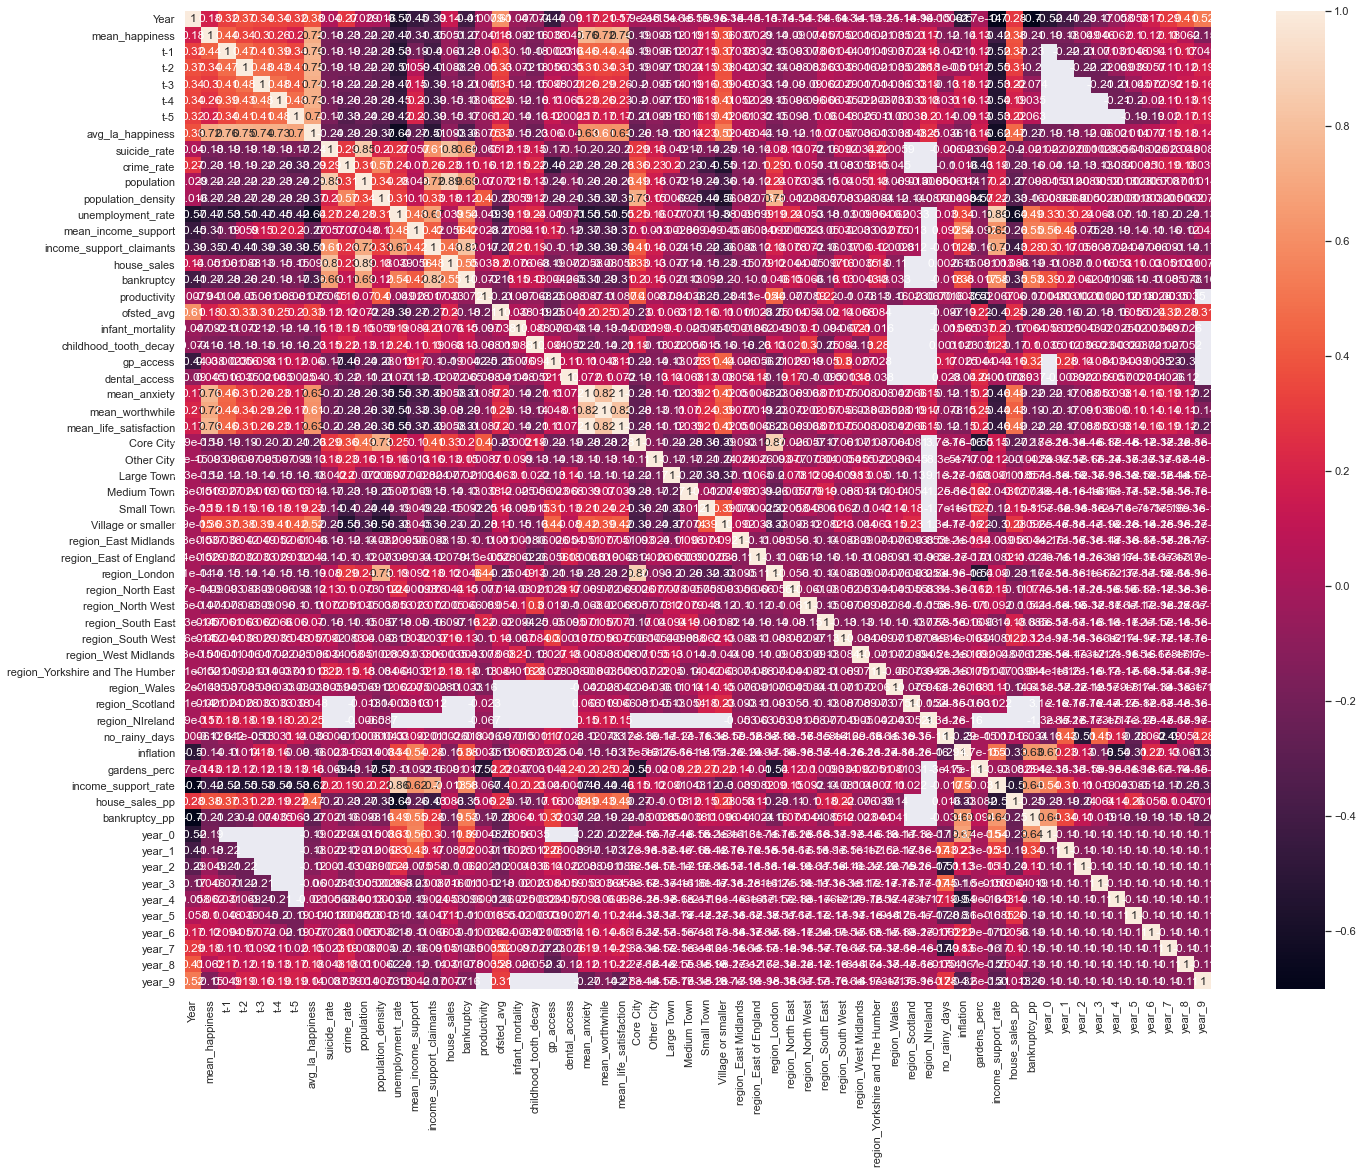

In [39]:
import seaborn as sns
sns.set(rc={'figure.figsize':(23,18)})

corr = merged_df.corr()
display(corr)

# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [40]:
merged_df.to_csv('../merged_data.csv', index=False)

# Classification df

In [41]:
def add_to_clustering_df(df, name, clustering_df):
    df = df.apply(pd.to_numeric)
    df.columns = [str(column).strip() for column in df.columns]
    
    tmp_df = pd.DataFrame()
    
    for i in range(len(years)-1):
        start_year = str(years[i])
        end_year = str(years[i+1])
        new_column = start_year + ' to '+ end_year
        
        try:
            tmp_df[new_column] = df[end_year] - df[start_year]
        except:
            tmp_df[new_column] = np.nan

    df_t = tmp_df.melt(ignore_index=False)
    df_t = df_t.rename(columns={'variable': "Year", 'value': name})
    df_t[name] = df_t[name].astype(float)
    df_t = df_t.reset_index()
    
    if clustering_df is None:
        clustering_df = df_t
    else:
        clustering_df = clustering_df.merge(df_t, how='left', on=['Area Code', 'Year'])
        
    return clustering_df

In [42]:
def grouping_hapiness(x):
    value = 0.1
    
    if x['mean_happiness']>value:
        return 1
    elif x['mean_happiness']<=value and x['mean_happiness']>-value:
        return 0
    else:
        return -1

In [43]:
def add_dict(_dict):
    _dict = {str(key):value for key, value in _dict.items()}
    new_dict = {}
    
    for i in range(len(years)-1):
        start_year = str(years[i])
        end_year = str(years[i+1])
        
        new_key = start_year + ' to '+ end_year
        new_dict[new_key] = _dict[end_year] - _dict[start_year]
        
    return new_dict

In [44]:
def find_previous_year(row):
    area_code = row['Area Code']
    year = row['Year']
    
    try:
        value = clustering_df[(clustering_df['Area Code']==area_code) & (clustering_df['Year']==year-1)]['mean_happiness'].item()
    except:
        value=np.nan
    
    return value

In [45]:
years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']

clustering_df = None

#Adding uniform dataframes
clustering_df = add_to_clustering_df(target_data, 'mean_happiness', clustering_df)
clustering_df = add_to_clustering_df(suicide_rates, 'suicides', clustering_df)
clustering_df = add_to_clustering_df(crimes, 'crimes', clustering_df)
clustering_df = add_to_clustering_df(population, 'population', clustering_df)
clustering_df = add_to_clustering_df(population_density, 'population_density', clustering_df)
clustering_df = add_to_clustering_df(unemployment, 'unemployment', clustering_df)
clustering_df = add_to_clustering_df(mean_income_support, 'mean_income_support', clustering_df)
clustering_df = add_to_clustering_df(n_is_claimants, 'n_is_claimants', clustering_df)
clustering_df = add_to_clustering_df(house_sales, 'house_sales', clustering_df)
clustering_df = add_to_clustering_df(bankruptcy, 'bankruptcy', clustering_df)
clustering_df = add_to_clustering_df(processing, 'processing', clustering_df)
clustering_df = add_to_clustering_df(productivity, 'productivity', clustering_df)
clustering_df = add_to_clustering_df(road_casualties, 'road_casualties', clustering_df)

#Unmeltign required dataframes
clustering_df = add_to_clustering_df(ofsted.pivot_table(index='Area Code', columns='Year')['ofsted_avg'], 
                                     'ofsted', clustering_df)
clustering_df = add_to_clustering_df(infant_mortality.pivot_table(index='Area Code', columns='Year')['infant_mortality'], 
                                     'infant_mortality', clustering_df)
clustering_df = add_to_clustering_df(childhood_tooth_decay.pivot_table(index='Area Code', columns='Year')['childhood_tooth_decay'], 
                                     'childhood_tooth_decay', clustering_df)
clustering_df = add_to_clustering_df(gp_access.pivot_table(index='Area Code', columns='Year')['gp_access'], 
                                     'gp_access', clustering_df)
clustering_df = add_to_clustering_df(dental_access.pivot_table(index='Area Code', columns='Year')['dental_access'], 
                                     'dental_access', clustering_df)

# Creating clusering columns
clustering_df['mean_happiness_3clusters'] = clustering_df.apply(grouping_hapiness, axis=1)
clustering_df['mean_happiness_binary'] = np.where(clustering_df.mean_happiness>0, 1, 0)

# Merging local authority (not yearly) data
clustering_df = clustering_df.merge(settle_size, how='left', on='Area Code')
clustering_df = clustering_df.merge(area_codes_df, how='left', on = 'Area Code')
clustering_df = clustering_df.merge(region_df, how='left', on = 'Area Code')

# Merging local authority (not yearly) dict
clustering_df['gardens_perc']= clustering_df['Area Code'].map(gardens_dict)

# Creating custom columns
clustering_df['income_support_rate'] = clustering_df['n_is_claimants'] / clustering_df['population']
clustering_df['house_sales_pp'] = clustering_df['house_sales'] / clustering_df['population']
clustering_df['bankruptcy_pp'] = clustering_df['bankruptcy'] / clustering_df['population']
clustering_df['suicide_rates'] = clustering_df['suicides'] / clustering_df['population']

# Merging yearly data
clustering_df['no_rainy_days']= clustering_df['Year'].map(add_dict(rainy_days))
clustering_df['inflation']= clustering_df['Year'].map(add_dict(inflation_dict))

# Mapping years to digits
year_dict = {'2011 to 2012':0, '2012 to 2013':1, '2013 to 2014':2, '2014 to 2015':3,'2015 to 2016':4, '2016 to 2017':5, '2017 to 2018':6, '2018 to 2019':7,'2019 to 2020':8}
clustering_df['Year'] = clustering_df['Year'].map(year_dict)

#Finding previous happiness change
clustering_df['previous_period_happiness_change'] = clustering_df.apply(find_previous_year, axis=1)

# Exporting
clustering_df.to_csv('../clustering_data.csv', index=False)

Columns not included:

- ofsted
- processing (doesn't have 2011)
- road casualties (doesnt ahve 2011 or 2012), this has funny column labels keep an eye on for future
- productivity (doesn't have 2020)
- child_hood_tooth_decay, 

In [46]:
clustering_df

,Area Code,Year,mean_happiness,suicides,crimes,population,population_density,unemployment,mean_income_support,n_is_claimants,...,region_Scotland,region_NIreland,gardens_perc,income_support_rate,house_sales_pp,bankruptcy_pp,suicide_rates,no_rainy_days,inflation,previous_period_happiness_change
0,E06000047,0,-0.06,-20.0,-7.740239,1267.0,0.569212,1.200000,-3.51,NaN,...,0,0,0.941,NaN,0.128650,-0.068666,-0.015785,15.7,-1.282878,NaN
1,E06000005,0,-0.12,-3.0,-12.366512,-81.0,-0.410177,0.801266,-3.00,-732.0,...,0,0,0.948,9.037037,-1.111111,0.123457,0.037037,15.7,-1.282878,NaN
2,E06000001,0,-0.12,0.0,-7.812996,173.0,1.846072,-0.749596,-3.41,-1012.0,...,0,0,0.941,-5.849711,0.404624,-0.040462,0.000000,15.7,-1.282878,NaN
3,E06000002,0,0.13,-1.0,-10.816688,358.0,6.644198,-0.083803,-3.57,-1699.0,...,0,0,0.946,-4.745810,0.486034,-0.067039,-0.002793,15.7,-1.282878,NaN
4,E06000057,0,0.20,1.0,-2.727673,211.0,0.042033,-0.200000,-2.76,-1445.0,...,0,0,0.928,-6.848341,-0.592417,-0.208531,0.004739,15.7,-1.282878,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3424,N09000006,8,-0.02,NaN,NaN,-60.0,-0.020949,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,5.8,-0.748618,-0.23
3425,N09000007,8,0.03,NaN,NaN,450.0,0.889705,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,5.8,-0.748618,-0.38
3426,N09000008,8,-0.19,NaN,NaN,169.0,0.159552,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,5.8,-0.748618,-0.21
3427,N09000009,8,-0.31,NaN,NaN,425.0,0.232070,NaN,NaN,NaN,...,0,1,NaN,NaN,NaN,NaN,NaN,5.8,-0.748618,0.37


In [47]:
merged_df

,Area Code,Year,mean_happiness,t-1,t-2,t-3,t-4,t-5,avg_la_happiness,suicide_rate,...,year_0,year_1,year_2,year_3,year_4,year_5,year_6,year_7,year_8,year_9
0,E06000047,2011,7.12,NaN,NaN,NaN,NaN,NaN,7.12,66.0,...,1,0,0,0,0,0,0,0,0,0
1,E06000005,2011,7.36,NaN,NaN,NaN,NaN,NaN,7.36,10.0,...,1,0,0,0,0,0,0,0,0,0
2,E06000001,2011,7.27,NaN,NaN,NaN,NaN,NaN,7.27,12.0,...,1,0,0,0,0,0,0,0,0,0
3,E06000002,2011,7.14,NaN,NaN,NaN,NaN,NaN,7.14,17.0,...,1,0,0,0,0,0,0,0,0,0
4,E06000057,2011,7.24,NaN,NaN,NaN,NaN,NaN,7.24,33.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,N09000006,2020,7.90,7.92,8.15,8.00,7.81,7.97,7.96,NaN,...,0,0,0,0,0,0,0,0,0,1
3806,N09000007,2020,7.56,7.53,7.91,7.89,7.80,7.44,7.69,NaN,...,0,0,0,0,0,0,0,0,0,1
3807,N09000008,2020,7.38,7.57,7.78,7.65,7.55,8.21,7.69,NaN,...,0,0,0,0,0,0,0,0,0,1
3808,N09000009,2020,7.81,8.12,7.75,7.85,7.73,7.89,7.86,NaN,...,0,0,0,0,0,0,0,0,0,1
